## Bagging Example

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,
max_features=0.5)

On utilise la base de données digits, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

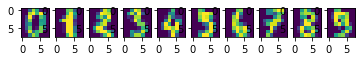

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

On utilise dans le TP comme classifieur de base un arbre de décision DecisionTreeClassifier. Ce classifieur nous permet d’établir des performances de référence (c’est un ensemble à 1 modèle).

In [5]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


Vu que sur la base d’apprentissage, on a obtenu accuracy = 1 . Pour plus de réalisme, découpons la base de 
données en un jeu d’apprentissage et un jeu de test afin de voir le comportement de généralisation de l’arbre sur des données différentes des celles d’apprentissage . 

In [6]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6773794808405439


Question : on construit la variance de la valeur accuracy sur 100 tirages pour la séparation 
apprentissage/test ; 

In [26]:
import time
N = 100 #100 tirages
accuracies = []
start_time = time.time()
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])
end_time = time.time()


0.6928306551297899
0.6928306551297899
0.6983930778739185
0.6823238566131026
0.7021013597033374
0.6372064276885043
0.6705809641532756
0.6897404202719407
0.703955500618047
0.6817058096415327
0.6260815822002472
0.6742892459826947
0.7045735475896168
0.7237330037082819
0.6736711990111248
0.6903584672435105
0.7058096415327565
0.6402966625463535
0.6656365883807169
0.681087762669963
0.6359703337453646
0.6619283065512979
0.7070457354758962
0.6953028430160693
0.6953028430160693
0.6600741656365884
0.5896168108776267
0.6711990111248455
0.6841779975278122
0.7126081582200248
0.6798516687268232
0.6415327564894932
0.6606922126081582
0.6854140914709518
0.6588380716934487
0.6854140914709518
0.6909765142150803
0.6415327564894932
0.688504326328801
0.6007416563658838
0.6940667490729295
0.6841779975278122
0.669344870210136
0.7021013597033374
0.7082818294190358
0.69221260815822
0.6965389369592089
0.7045735475896168
0.69221260815822
0.6872682323856613
0.6903584672435105
0.6489493201483313
0.6872682323856613
0

In [27]:
print("temps d'execution",str(end_time - start_time))

temps d'execution 0.3031742572784424


In [16]:
print(f"la variance de la valeur accuracy sur 100 tirages est :{np.std(accuracies)}")

la variance de la valeur accuracy sur 100 tirages est :0.027849086124201405


Conclusion : On a entrainé le même modele 100 fois et on abtenu que à peu près 3% d'accuracy, ce qui nous indique que le modèle n'est pas assez bon. Une autre remarque c'est que le temps d'éxecution était trop rapide, il ne prend que 0,30s pour faire du traitement. 

Pour comparer, construisons mainntenant un classifieur bagging sur nos données, toujours 
basé sur les DecisionTreeClassifier :

In [19]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)

In [20]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

Question : Calculons la variance de la valeur accuracy sur 100
tirages pour la séparation apprentissage/test. 


In [28]:
accuracy

0.9054388133498146

In [32]:
import time
accuracies = []
start_time = time.time()
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),
    max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    accuracies.append(accuracy)
end_time = time.time()

In [33]:
print("temps d'execution",str(end_time - start_time))
print(f"la variance de la valeur accuracy sur 100 tirage est :{np.std(accuracies)}")

temps d'execution 40.25039482116699
la variance de la valeur accuracy sur 100 tirage est :0.013463123039738166


Conclusion :Cette méthode de bagging a pris beaucoup de temps pour le traitement 40.25s , En outre, la variance de la valeur accuracy a diminué, on a obtenu 0,013 par contre au premier temps on a obtenu 0.027. On conclut donc que cette méthode est beaucoup plus mieux que l'autre en terme de minimisation d'erreur . 

Construction du graphique accuracy vs n_estimators : 

<Figure size 432x288 with 0 Axes>

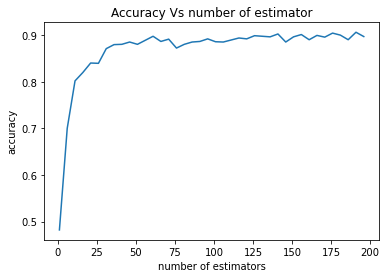

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
plt.figure()
n_estm = []
n_accuracy = []
for i in range(1,200,5):
    clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    n_estm.append(i)
    n_accuracy.append(accuracy)
plt.figure()
plt.plot(n_estm,n_accuracy)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Accuracy Vs number of estimator')
plt.show()  

A partir d'un nombre d'estimateurs égale à 100 , nous constatons une accurence stable entre 0.8 et 0.9 ; Ce qui explique que le bon nombre d'estimateurs qu'on peut prendre est entre 100 et 150.

Maintenant, on fait varier les parametres max_samples et max_features. On cherche les valeurs pour obrtenir le 
meilleur résultat, On pourra notamment utiliser la méthode GridSearchCV pour réaliser une recherche 
systématique : 

In [42]:
Dict = {"max_samples":[0.1 , 0.2 , 0.3, 0.4 ,0.5,0.6,0.7,0.8,0.9,1.0],
       "max_features": [i for i in range(0,X.shape[1],5)],
       "n_estimators":[200]}
Dict

{'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'max_features': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
 'n_estimators': [200]}

In [43]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=Dict, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 650.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 342, in _fit
    raise ValueError("max_features must be in (0

Meilleur score : 0.9011124845488258
max_samples: 1.0
max_features: 25


## Forêts aléatoires

Par la suite nous allons refaire la classification sur la base Digits en utilisant un 
classifieur RandomForestClassifier. Comme d’habitude, on sépare les données en gardant 10% 
pour l’apprentissage et 90% pour le test : 

In [48]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.90)

On crée et on entraîne notre modèle :

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

On réalise les prédictions et on calcule le score de test : 

In [50]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9264524103831892


Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même 
nombre d’arbres (200 dans notre cas) : 

In [53]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))
        
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging : " + str(clf.score(X_test,y_test)))
        
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6847960444993819
Bagging : 0.9171817058096415
Forêt aléatoire : 0.9295426452410384


les forêts aléatoires produisent un classifieur meilleur sur cette base de données par rapport aux arbres de décision et le Bagging,ce qui logique puisque l'algomètre optimise les arbres de décision par la randomisation dans la sélection des attributs.

On construit la variance de la valeur accuracy sur 100 tirages pour la séparation 
apprentissage/test. 

In [79]:
# Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.
list_accuracy = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    list_accuracy.append(accuracy)
print(f"la moyenne d'accuracy pour les 100 tirages {np.mean(list_accuracy)}")
print(f"la variance d'accuracy pour les 100 tirages {np.std(list_accuracy)}")


la moyenne d'accuracy pour les 100 tirages 0.9117985166872683
la variance d'accuracy pour les 100 tirages 0.013604418434946846


 Conclusion : Nous avons obtenu un taux moyen d'erreurs, et aussi une variance faible.


On construit le graphique accuracy vs n_estimators : 

In [80]:
plt.figure()
n_estm = []
n_accuracy = []
for i in range(1,200,5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    n_estm.append(i)
    n_accuracy.append(accuracy)

<Figure size 432x288 with 0 Axes>

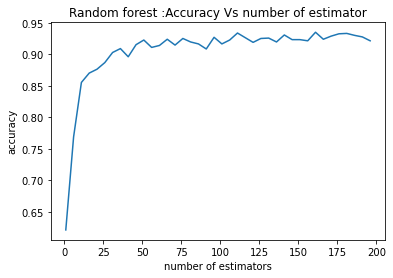

In [81]:
plt.figure()
plt.plot(n_estm,n_accuracy)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Random forest :Accuracy Vs number of estimator')
plt.show()

 A partir de ``n_estimators = 30`` le résultat commence à  osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

Regardons dans la documentation les ExtraTreesClassifier et refaites la classification avec ce 
type de classifieur. et On compare avec RandomForestClassifier : 

In [58]:
from sklearn.ensemble import ExtraTreesClassifier        
import numpy as np
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
        
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))
        
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees Classifier : " + str(accuracy))


Forêt aléatoire : 0.9134734239802225
Extra Trees Classifier : 0.9363411619283065


Les Extra-Trees randomisent encore plus la construction de l'arbre et sont utilisés  pour des données numériques. Par rapport aux forêts aléatoires, pour chaque *feature* candidat choisissent un seuil de coupure aléatoire. La plupart du temps, leur taux d'erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.

## Boosting

Nous allons refaire la classification sur la base Digits en utilisant un 
classifieur RandomForestClassifier :

In [82]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf
AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9066749072929543


In [83]:
# test pour Le paramètre max_depth
accuracy_dict = {}
for i in range(1,20):
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),n_estimators=200, learning_rate=2)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  accuracy_dict[i] = accuracy
accuracy_dict

{1: 0.7373300370828183,
 2: 0.8102595797280593,
 3: 0.8745364647713226,
 4: 0.9060568603213844,
 5: 0.9004944375772559,
 6: 0.9091470951792336,
 7: 0.9097651421508035,
 8: 0.9165636588380717,
 9: 0.6965389369592089,
 10: 0.6878862793572311,
 11: 0.6674907292954264,
 12: 0.6940667490729295,
 13: 0.6817058096415327,
 14: 0.681087762669963,
 15: 0.6798516687268232,
 16: 0.6724351050679852,
 17: 0.7045735475896168,
 18: 0.6495673671199012,
 19: 0.6983930778739185}

In [84]:
# test pour Le paramètre learning_rate
accuracy_dict = {}
for i in range(1,10):
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=200, learning_rate=i)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  accuracy_dict[i] = accuracy
accuracy_dict

{1: 0.8967861557478368,
 2: 0.9035846724351051,
 3: 0.9110012360939431,
 4: 0.8788627935723115,
 5: 0.8677379480840544,
 6: 0.7818294190358467,
 7: 0.7836835599505563,
 8: 0.754017305315204,
 9: 0.6149567367119901}

Conclusion : Une valeur plus faible de ``learning_rate`` permet d'améliorer le score, mais pas au-delà  d'une certaine valeur.